# ARIMA Model

Source:

https://www.machinelearningplus.com/time-series/arima-model-time-series-forecasting-python/

## 1. Introduction to Time Series Forecasting

This post focuses on a particular type of forecasting method called ARIMA modeling.

ARIMA, short for ‘AutoRegressive Integrated Moving Average’, is a forecasting algorithm based on the idea that the information in the past values of the time series can alone be used to predict the future values.

## 2. Introduction to ARIMA Models

Any ‘non-seasonal’ time series that exhibits patterns and is not a random white noise can be modeled with ARIMA models.

If a time series, has seasonal patterns, then you need to add seasonal terms and it becomes SARIMA, short for ‘Seasonal ARIMA’. More on that once we finish ARIMA.

An ARIMA model is characterized by 3 terms: **p, d, q**

where,

- p is the order of the AR term

- q is the order of the MA term

- d is the number of differencing required to make the time series stationary

## 3. What does the p, d and q in ARIMA model mean?

The value of d, therefore, is the minimum number of differencing needed to make the series stationary. And if the time series is already stationary, then d = 0.

Next, what are the ‘p’ and ‘q’ terms?

- ‘p’ is the order of the ‘Auto Regressive’ (AR) term. 
- It refers to the number of lags of Y to be used as predictors. 
- ‘q’ is the order of the ‘Moving Average’ (MA) term. 
- It refers to the number of lagged forecast errors that should go into the ARIMA Model.

## 4. What are AR and MA models?

A pure Auto Regressive (AR only) model is one where Yt depends only on its own lags. 

In [ ]:
from IPython.display import Image
Image(filename="./figures/Equation-1-min.png")

Likewise a pure Moving Average (MA only) model is one where Yt depends only on the lagged forecast errors where the error terms are the errors of the autoregressive models of the respective lags:

In [ ]:
from IPython.display import Image
Image(filename="./figures/Equation-2-min.png")

An ARIMA model is one where the time series was differenced at least once to make it stationary and you combine the AR and the MA terms. So the equation becomes:

In [ ]:
from IPython.display import Image
Image(filename="./figures/Equation-4-min.png")

ARIMA model in words:

Predicted Yt = Constant + Linear combination Lags of Y (upto p lags) + Linear Combination of Lagged forecast errors (upto q lags)

## 5. How to find the order of differencing (d) in ARIMA model

In [1]:
from dateutil.parser import parse 
import matplotlib as mpl
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import pandas as pd
plt.rcParams.update({'figure.figsize': (10, 7), 'figure.dpi': 120})

# Import as Dataframe
df = pd.read_csv('https://raw.githubusercontent.com/selva86/datasets/master/wwwusage.csv', names=['value'], header=0)

In [2]:
from statsmodels.tsa.stattools import adfuller
from numpy import log
result = adfuller(df.value.dropna())
print('ADF Statistic: %f' % result[0])
print('p-value: %f' % result[1])

ADF Statistic: -2.464240
p-value: 0.124419


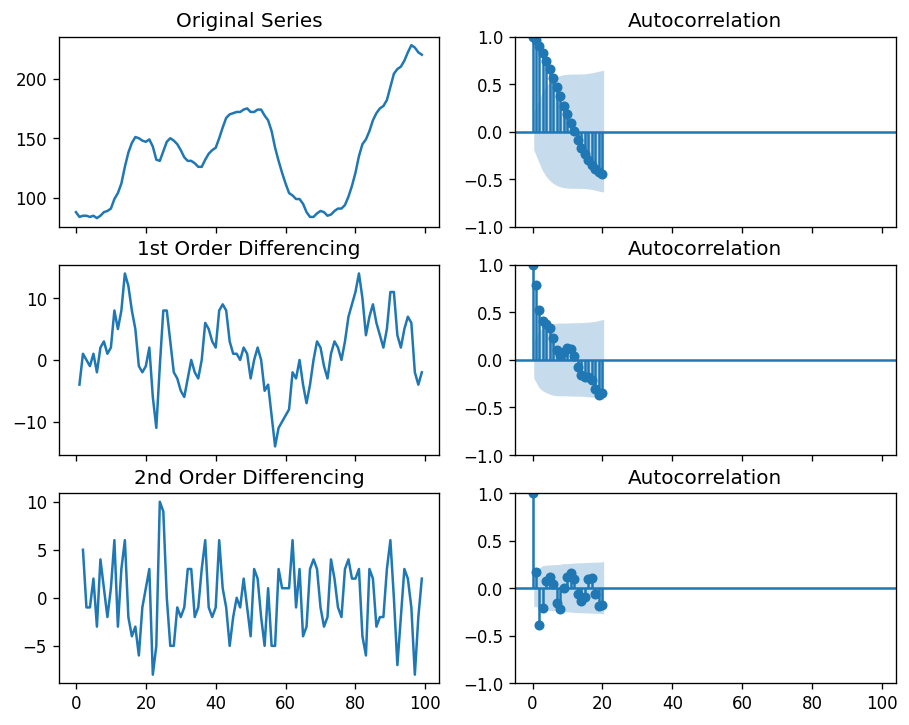

In [3]:
import numpy as np, pandas as pd
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf
import matplotlib.pyplot as plt
plt.rcParams.update({'figure.figsize':(9,7), 'figure.dpi':120})

# Import data
df = pd.read_csv('https://raw.githubusercontent.com/selva86/datasets/master/wwwusage.csv', names=['value'], header=0)

# Original Series
fig, axes = plt.subplots(3, 2, sharex=True)
axes[0, 0].plot(df.value); axes[0, 0].set_title('Original Series')
plot_acf(df.value, ax=axes[0, 1])

# 1st Differencing
axes[1, 0].plot(df.value.diff()); axes[1, 0].set_title('1st Order Differencing')
plot_acf(df.value.diff().dropna(), ax=axes[1, 1])

# 2nd Differencing
axes[2, 0].plot(df.value.diff().diff()); axes[2, 0].set_title('2nd Order Differencing')
plot_acf(df.value.diff().diff().dropna(), ax=axes[2, 1])

plt.show()

For the above series, the time series reaches stationarity with two orders of differencing. 

In [ ]:
# import pmdarima as pm
# from pmdarima import arima
# df = pd.read_csv('https://raw.githubusercontent.com/selva86/datasets/master/wwwusage.csv', names=['value'], header=0)
# y = df['value']

# ## Adf Test
# arima.ndiffs(y, test='adf')  # 2

# # KPSS test
# arima.ndiffs(y, test='kpss')  # 0

# # PP test:
# arima.ndiffs(y, test='pp')  # 2

ValueError: numpy.dtype size changed, may indicate binary incompatibility. Expected 96 from C header, got 88 from PyObject

## 6. How to find the order of the AR term (p)

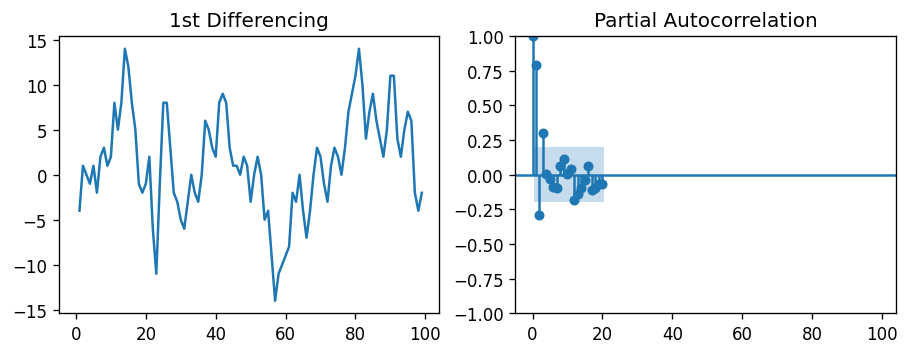

In [5]:
# PACF plot of 1st differenced series
plt.rcParams.update({'figure.figsize':(9,3), 'figure.dpi':120})

fig, axes = plt.subplots(1, 2, sharex=True)
axes[0].plot(df.value.diff()); axes[0].set_title('1st Differencing')
axes[1].set(ylim=(0,5))
plot_pacf(df.value.diff().dropna(), ax=axes[1])

plt.show()

Any autocorrelation in a stationarized series can be rectified by adding enough AR terms. So, we initially take the order of AR term to be equal to as many lags that crosses the significance limit in the PACF plot.

## 7. How to find the order of the MA term (q)

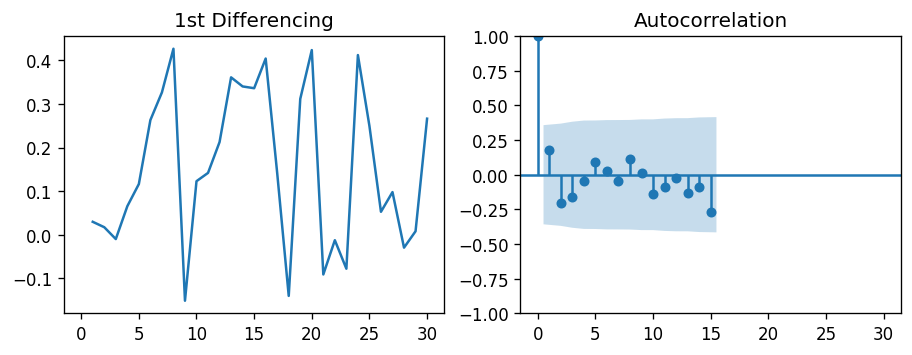

In [6]:
import pandas as pd
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf
import matplotlib.pyplot as plt
plt.rcParams.update({'figure.figsize':(9,3), 'figure.dpi':120})

# Import data
df = pd.read_csv('https://raw.githubusercontent.com/selva86/datasets/master/austa.csv')

fig, axes = plt.subplots(1, 2, sharex=True)
axes[0].plot(df.value.diff()); axes[0].set_title('1st Differencing')
axes[1].set(ylim=(0,1.2))
plot_acf(df.value.diff().dropna(), ax=axes[1])

plt.show()

Couple of lags are well above the significance line. So, let’s tentatively fix q as 2. 

## 8. How to handle if a time series is slightly under or over differenced

If your series is slightly under differenced, adding one or more additional AR terms usually makes it up.

## 9. How to build the ARIMA Model

In [10]:
from statsmodels.tsa.arima.model import ARIMA

# 1,1,2 ARIMA Model
model = ARIMA(df.value, order=(1,1,2))
model_fit = model.fit()
print(model_fit.summary())

                               SARIMAX Results                                
Dep. Variable:                  value   No. Observations:                   31
Model:                 ARIMA(1, 1, 2)   Log Likelihood                   8.315
Date:                Wed, 22 Jan 2025   AIC                             -8.629
Time:                        19:26:59   BIC                             -3.024
Sample:                             0   HQIC                            -6.836
                                 - 31                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1          0.9999      0.037     27.161      0.000       0.928       1.072
ma.L1         -0.6891      1.669     -0.413      0.680      -3.961       2.583
ma.L2         -0.2993      0.603     -0.496      0.6

/Users/mjack6/GSU_Spring2025/MSA8200/venv_timeseries/lib/python3.9/site-packages/statsmodels/tsa/statespace/sarimax.py:966: UserWarning: Non-stationary starting autoregressive parameters found. Using zeros as starting parameters.
  warn('Non-stationary starting autoregressive parameters'
/Users/mjack6/GSU_Spring2025/MSA8200/venv_timeseries/lib/python3.9/site-packages/statsmodels/tsa/statespace/sarimax.py:978: UserWarning: Non-invertible starting MA parameters found. Using zeros as starting parameters.
  warn('Non-invertible starting MA parameters found.'


In [11]:
# 1,1,1 ARIMA Model
model = ARIMA(df.value, order=(1,1,1))
model_fit = model.fit()
print(model_fit.summary())

                               SARIMAX Results                                
Dep. Variable:                  value   No. Observations:                   31
Model:                 ARIMA(1, 1, 1)   Log Likelihood                   7.329
Date:                Wed, 22 Jan 2025   AIC                             -8.657
Time:                        19:27:09   BIC                             -4.453
Sample:                             0   HQIC                            -7.312
                                 - 31                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1          0.9998      0.017     57.345      0.000       0.966       1.034
ma.L1         -0.9848      0.769     -1.280      0.200      -2.492       0.523
sigma2         0.0329      0.031      1.071      0.2

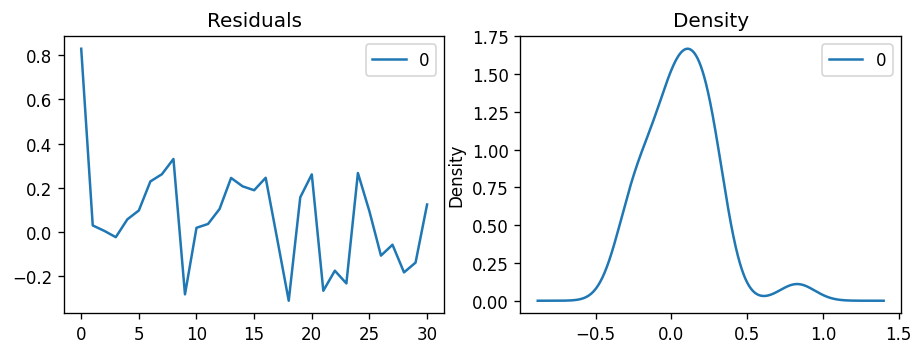

In [12]:
# Plot residual errors
residuals = pd.DataFrame(model_fit.resid)
fig, ax = plt.subplots(1,2)
residuals.plot(title="Residuals", ax=ax[0])
residuals.plot(kind='kde', title='Density', ax=ax[1])
plt.show()

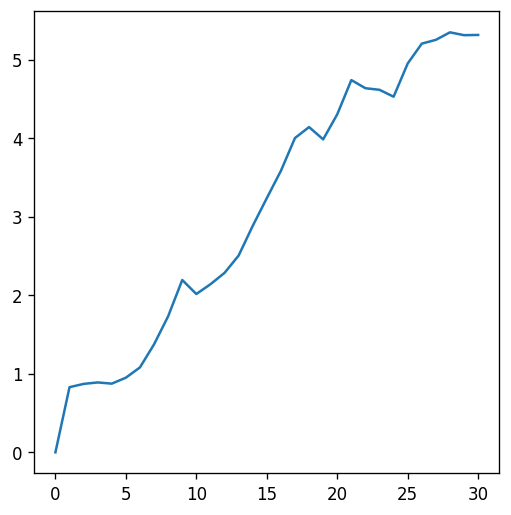

In [ ]:
# Actual vs Fitted
fig,ax = plt.subplots(figsize=(5,5))
model_fit.predict().plot(ax=ax,label='Predictions')
plt.show()

## 10. How to do find the optimal ARIMA model manually using Out-of-Time Cross Validation

In [36]:
from statsmodels.tsa.stattools import acf

# Create Training and Test
train = df.value[:25]
test = df.value[25:]

                               SARIMAX Results                                
Dep. Variable:                  value   No. Observations:                   25
Model:                 ARIMA(1, 1, 1)   Log Likelihood                   4.130
Date:                Wed, 22 Jan 2025   AIC                             -2.260
Time:                        19:51:10   BIC                              1.274
Sample:                             0   HQIC                            -1.322
                                 - 25                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1          0.9996      0.025     39.684      0.000       0.950       1.049
ma.L1         -0.9767      0.699     -1.398      0.162      -2.346       0.393
sigma2         0.0376      0.037      1.006      0.3

/Users/mjack6/GSU_Spring2025/MSA8200/venv_timeseries/lib/python3.9/site-packages/statsmodels/tsa/statespace/representation.py:374: FutureWarning: Unknown keyword arguments: dict_keys(['alpha']).Passing unknown keyword arguments will raise a TypeError beginning in version 0.15.
  warnings.warn(msg, FutureWarning)


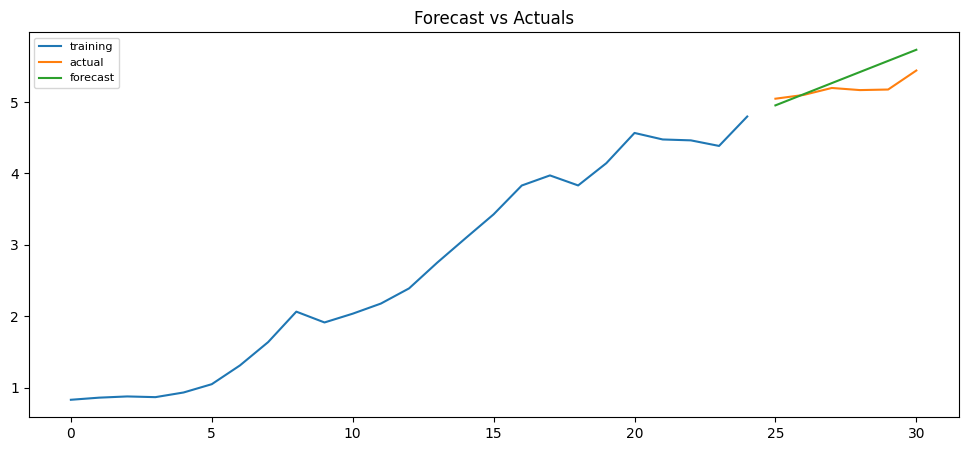

In [37]:
# Build Model
# model = ARIMA(train, order=(3,2,1))  
model = ARIMA(train, order=(1, 1, 1))  
fitted = model.fit()  
print(fitted.summary())

# Forecast
forecast = fitted.forecast(15, alpha=0.05)  # 95% conf

fc = forecast
# fc, se, conf = forecast[0]

# Make as pandas series
fc_series = pd.Series(fc, index=test.index)
# lower_series = pd.Series(conf[:, 0], index=test.index)
# upper_series = pd.Series(conf[:, 1], index=test.index)

# Plot
plt.figure(figsize=(12,5), dpi=100)
plt.plot(train, label='training')
plt.plot(test, label='actual')
plt.plot(fc_series, label='forecast')
# plt.fill_between(lower_series.index, lower_series, upper_series, 
#                  color='k', alpha=.15)
plt.title('Forecast vs Actuals')
plt.legend(loc='upper left', fontsize=8)
plt.show()

                               SARIMAX Results                                
Dep. Variable:                  value   No. Observations:                   25
Model:                 ARIMA(3, 2, 1)   Log Likelihood                   4.702
Date:                Wed, 22 Jan 2025   AIC                              0.595
Time:                        19:51:14   BIC                              6.273
Sample:                             0   HQIC                             2.023
                                 - 25                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1          0.2177      0.247      0.880      0.379      -0.267       0.703
ar.L2         -0.1920      0.307     -0.626      0.531      -0.793       0.409
ar.L3         -0.0941      0.216     -0.436      0.6

/Users/mjack6/GSU_Spring2025/MSA8200/venv_timeseries/lib/python3.9/site-packages/statsmodels/tsa/statespace/representation.py:374: FutureWarning: Unknown keyword arguments: dict_keys(['alpha']).Passing unknown keyword arguments will raise a TypeError beginning in version 0.15.
  warnings.warn(msg, FutureWarning)


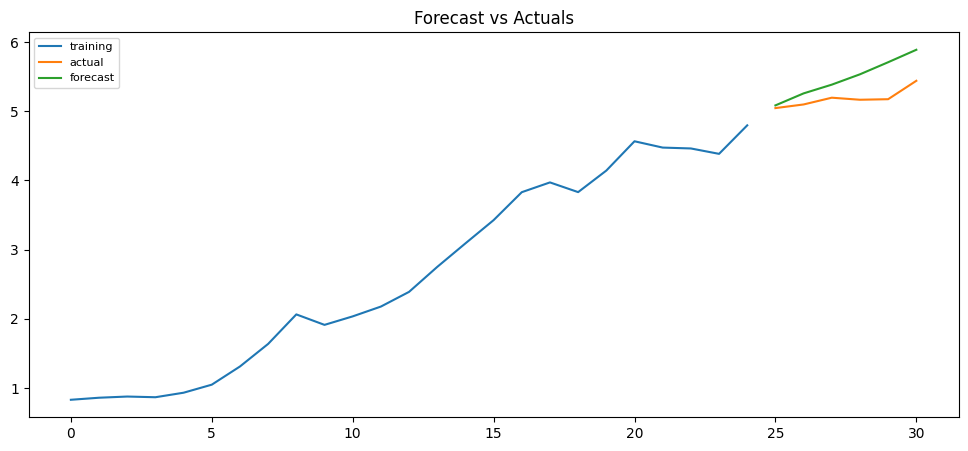

In [38]:
# Build Model
model = ARIMA(train, order=(3, 2, 1))  
fitted = model.fit()  
print(fitted.summary())

# Forecast
forecast = fitted.forecast(15, alpha=0.05)  # 95% conf
fc = forecast
# fc, se, conf = forecast[0]

# Make as pandas series
fc_series = pd.Series(fc, index=test.index)
# lower_series = pd.Series(conf[:, 0], index=test.index)
# upper_series = pd.Series(conf[:, 1], index=test.index)

# Plot
plt.figure(figsize=(12,5), dpi=100)
plt.plot(train, label='training')
plt.plot(test, label='actual')
plt.plot(fc_series, label='forecast')
# plt.fill_between(lower_series.index, lower_series, upper_series, 
#                  color='k', alpha=.15)
plt.title('Forecast vs Actuals')
plt.legend(loc='upper left', fontsize=8)
plt.show()

## 11. Accuracy Metrics for Time Series Forecast

In [84]:
# Accuracy metrics
import numpy as np
def forecast_accuracy(forecast, actual):
    mape = np.mean(np.abs(forecast - actual)/np.abs(actual))  # MAPE
    me = np.mean(forecast - actual)             # ME
    mae = np.mean(np.abs(forecast - actual))    # MAE
    mpe = np.mean((forecast - actual)/actual)   # MPE
    rmse = np.mean((forecast - actual)**2)**.5  # RMSE
    corr = np.corrcoef(forecast, actual)[0,1]   # corr
    # mins = np.amin(np.hstack([forecast[:,None], 
    #                           actual[:,None]]), axis=1)
    # maxs = np.amax(np.hstack([forecast[:,None], 
    #                           actual[:,None]]), axis=1)
    # minmax = 1 - np.mean(mins/maxs)             # minmax
    acf1 = acf(forecast - actual)[1]              # ACF1
    return({
        'mape':mape, 'me':me, 'mae': mae, 
        'mpe':mpe, 'rmse':rmse, 'acf1':acf1, 
        'corr':corr, 
        # 'minmax':minmax
        })

fc_values = pd.Series(fc, index=test.index).values
print(fc_values)

forecast_accuracy(fc_series, test.values)

#> {'mape': 0.02250131357314834,
#>  'me': 3.230783108990054,
#>  'mae': 4.548322194530069,
#>  'mpe': 0.016421001932706705,
#>  'rmse': 6.373238534601827,
#>  'acf1': 0.5105506325288692,
#>  'corr': 0.9674576513924394,
#>  'minmax': 0.02163154777672227}

[5.08528127 5.25886777 5.3850929  5.5346755  5.70923646 5.88920706]


{'mape': np.float64(0.05538485029797787),
 'me': np.float64(0.2897318283535116),
 'mae': np.float64(0.2897318283535116),
 'mpe': np.float64(0.05538485029797787),
 'rmse': np.float64(0.3378088619176717),
 'acf1': np.float64(0.5283001514377601),
 'corr': np.float64(0.865628602915562)}

## 12. How to do Auto Arima Forecast in Python

In [40]:
import pmdarima as pm

df = pd.read_csv('https://raw.githubusercontent.com/selva86/datasets/master/wwwusage.csv', names=['value'], header=0)

model = pm.auto_arima(df.value, start_p=1, start_q=1,
                      test='adf',       # use adftest to find optimal 'd'
                      max_p=3, max_q=3, # maximum p and q
                      m=1,              # frequency of series
                      d=None,           # let model determine 'd'
                      seasonal=False,   # No Seasonality
                      start_P=0, 
                      D=0, 
                      trace=True,
                      error_action='ignore',  
                      suppress_warnings=True, 
                      stepwise=True)

print(model.summary())

#> Fit ARIMA: order=(1, 2, 1); AIC=525.586, BIC=535.926, Fit time=0.060 seconds
#> Fit ARIMA: order=(0, 2, 0); AIC=533.474, BIC=538.644, Fit time=0.005 seconds
#> Fit ARIMA: order=(1, 2, 0); AIC=532.437, BIC=540.192, Fit time=0.035 seconds
#> Fit ARIMA: order=(0, 2, 1); AIC=525.893, BIC=533.648, Fit time=0.040 seconds
#> Fit ARIMA: order=(2, 2, 1); AIC=515.248, BIC=528.173, Fit time=0.105 seconds
#> Fit ARIMA: order=(2, 2, 0); AIC=513.459, BIC=523.798, Fit time=0.063 seconds
#> Fit ARIMA: order=(3, 2, 1); AIC=512.552, BIC=528.062, Fit time=0.272 seconds
#> Fit ARIMA: order=(3, 2, 0); AIC=515.284, BIC=528.209, Fit time=0.042 seconds
#> Fit ARIMA: order=(3, 2, 2); AIC=514.514, BIC=532.609, Fit time=0.234 seconds
#> Total fit time: 0.865 seconds
#>                              ARIMA Model Results                              
#> ==============================================================================
#> Dep. Variable:                   D2.y   No. Observations:                   98
#> Model:                 ARIMA(3, 2, 1)   Log Likelihood                -250.276
#> Method:                       css-mle   S.D. of innovations              3.069
#> Date:                Sat, 09 Feb 2019   AIC                            512.552
#> Time:                        12:57:22   BIC                            528.062
#> Sample:                             2   HQIC                           518.825
#> 
#> ==============================================================================
#>                  coef    std err          z      P>|z|      [0.025      0.975]
#> ------------------------------------------------------------------------------
#> const          0.0234      0.058      0.404      0.687      -0.090       0.137
#> ar.L1.D2.y     1.1586      0.097     11.965      0.000       0.969       1.348
#> ar.L2.D2.y    -0.6640      0.136     -4.890      0.000      -0.930      -0.398
#> ar.L3.D2.y     0.3453      0.096      3.588      0.001       0.157       0.534
#> ma.L1.D2.y    -1.0000      0.028    -36.302      0.000      -1.054      -0.946
#>                                     Roots                                    
#> =============================================================================
#>                   Real          Imaginary           Modulus         Frequency
#> -----------------------------------------------------------------------------
#> AR.1            1.1703           -0.0000j            1.1703           -0.0000
#> AR.2            0.3763           -1.5274j            1.5731           -0.2116
#> AR.3            0.3763           +1.5274j            1.5731            0.2116
#> MA.1            1.0000           +0.0000j            1.0000            0.0000
#> -----------------------------------------------------------------------------


ValueError: numpy.dtype size changed, may indicate binary incompatibility. Expected 96 from C header, got 88 from PyObject

## 13. How to interpret the residual plots in ARIMA model

In [41]:
model.plot_diagnostics(figsize=(7,5))
plt.show()

AttributeError: 'ARIMA' object has no attribute 'plot_diagnostics'

In [42]:
# Forecast
n_periods = 24
fc, confint = model.predict(n_periods=n_periods, return_conf_int=True)
index_of_fc = np.arange(len(df.value), len(df.value)+n_periods)

# make series for plotting purpose
fc_series = pd.Series(fc, index=index_of_fc)
lower_series = pd.Series(confint[:, 0], index=index_of_fc)
upper_series = pd.Series(confint[:, 1], index=index_of_fc)

# Plot
plt.plot(df.value)
plt.plot(fc_series, color='darkgreen')
plt.fill_between(lower_series.index, 
                 lower_series, 
                 upper_series, 
                 color='k', alpha=.15)

plt.title("Final Forecast of WWW Usage")
plt.show()

TypeError: predict() missing 1 required positional argument: 'params'

## 14. How to automatically build SARIMA model in python

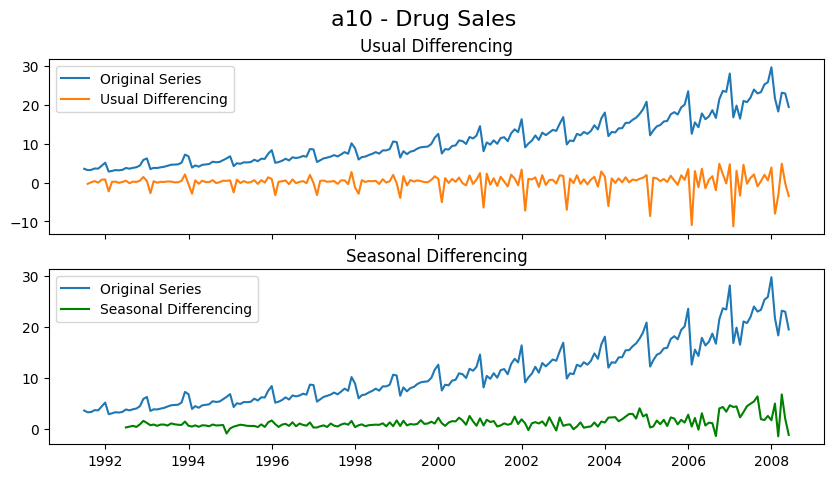

In [43]:
# Import
data = pd.read_csv('https://raw.githubusercontent.com/selva86/datasets/master/a10.csv', parse_dates=['date'], index_col='date')

# Plot
fig, axes = plt.subplots(2, 1, figsize=(10,5), dpi=100, sharex=True)

# Usual Differencing
axes[0].plot(data[:], label='Original Series')
axes[0].plot(data[:].diff(1), label='Usual Differencing')
axes[0].set_title('Usual Differencing')
axes[0].legend(loc='upper left', fontsize=10)


# Seasinal Dei
axes[1].plot(data[:], label='Original Series')
axes[1].plot(data[:].diff(12), label='Seasonal Differencing', color='green')
axes[1].set_title('Seasonal Differencing')
plt.legend(loc='upper left', fontsize=10)
plt.suptitle('a10 - Drug Sales', fontsize=16)
plt.show()

In [44]:
# !pip install pmdarima
import pmdarima as pm

# Seasonal - fit stepwise auto-ARIMA
smodel = pm.auto_arima(data, start_p=1, start_q=1,
                         test='adf',
                         max_p=3, max_q=3, m=12,
                         start_P=0, seasonal=True,
                         d=None, D=1, trace=True,
                         error_action='ignore',  
                         suppress_warnings=True, 
                         stepwise=True)

smodel.summary()

ValueError: numpy.dtype size changed, may indicate binary incompatibility. Expected 96 from C header, got 88 from PyObject

In [ ]:
# Fit ARIMA: order=(1, 0, 1) seasonal_order=(0, 1, 1, 12); AIC=534.818, BIC=551.105, Fit time=1.742 seconds
# Fit ARIMA: order=(0, 0, 0) seasonal_order=(0, 1, 0, 12); AIC=624.061, BIC=630.576, Fit time=0.028 seconds
# Fit ARIMA: order=(1, 0, 0) seasonal_order=(1, 1, 0, 12); AIC=596.004, BIC=609.034, Fit time=0.683 seconds
# Fit ARIMA: order=(0, 0, 1) seasonal_order=(0, 1, 1, 12); AIC=611.475, BIC=624.505, Fit time=0.709 seconds
# Fit ARIMA: order=(1, 0, 1) seasonal_order=(1, 1, 1, 12); AIC=557.501, BIC=577.046, Fit time=3.687 seconds
# (...TRUNCATED...)
# Fit ARIMA: order=(3, 0, 0) seasonal_order=(1, 1, 1, 12); AIC=554.570, BIC=577.372, Fit time=2.431 seconds
# Fit ARIMA: order=(3, 0, 0) seasonal_order=(0, 1, 0, 12); AIC=554.094, BIC=570.381, Fit time=0.220 seconds
# Fit ARIMA: order=(3, 0, 0) seasonal_order=(0, 1, 2, 12); AIC=529.502, BIC=552.305, Fit time=2.120 seconds
# Fit ARIMA: order=(3, 0, 0) seasonal_order=(1, 1, 2, 12); AIC=nan, BIC=nan, Fit time=nan seconds
# Total fit time: 31.613 seconds

In [45]:
# Forecast
n_periods = 24
fitted, confint = smodel.predict(n_periods=n_periods, return_conf_int=True)
index_of_fc = pd.date_range(data.index[-1], periods = n_periods, freq='MS')

# make series for plotting purpose
fitted_series = pd.Series(fitted, index=index_of_fc)
lower_series = pd.Series(confint[:, 0], index=index_of_fc)
upper_series = pd.Series(confint[:, 1], index=index_of_fc)

# Plot
plt.plot(data)
plt.plot(fitted_series, color='darkgreen')
plt.fill_between(lower_series.index, 
                 lower_series, 
                 upper_series, 
                 color='k', alpha=.15)

plt.title("SARIMA - Final Forecast of a10 - Drug Sales")
plt.show()

NameError: name 'smodel' is not defined

## 15. How to build SARIMAX Model with exogenous variable

In [46]:
# Import Data
data = pd.read_csv('https://raw.githubusercontent.com/selva86/datasets/master/a10.csv', parse_dates=['date'], index_col='date')

In [47]:
# Compute Seasonal Index
from statsmodels.tsa.seasonal import seasonal_decompose
from dateutil.parser import parse

# multiplicative seasonal component
result_mul = seasonal_decompose(data['value'][-36:],   # 3 years
                                model='multiplicative', 
                                extrapolate_trend='freq')

seasonal_index = result_mul.seasonal[-12:].to_frame()
seasonal_index['month'] = pd.to_datetime(seasonal_index.index).month

# merge with the base data
data['month'] = data.index.month
df = pd.merge(data, seasonal_index, how='left', on='month')
df.columns = ['value', 'month', 'seasonal_index']
df.index = data.index  # reassign the index.

In [62]:
df['value'].values

array([ 3.526591  ,  3.180891  ,  3.252221  ,  3.611003  ,  3.565869  ,
        4.306371  ,  5.088335  ,  2.81452   ,  2.985811  ,  3.20478   ,
        3.127578  ,  3.270523  ,  3.73785082,  3.55877609,  3.77720173,
        3.92449042,  4.38653092,  5.81054917,  6.19206769,  3.45085699,
        3.77230686,  3.7343029 ,  3.90539892,  4.04968714,  4.31556552,
        4.56218455,  4.60866203,  4.66785129,  5.09384145,  7.1799622 ,
        6.73147308,  3.84127758,  4.39407557,  4.07534073,  4.5406449 ,
        4.64561508,  4.75260653,  5.35060467,  5.20445484,  5.3016513 ,
        5.77374216,  6.20459348,  6.74948382,  4.21606735,  4.94934946,
        4.8230449 ,  5.19475419,  5.17078711,  5.25674157,  5.85527729,
        5.49072901,  6.11529323,  6.08847284,  7.41659792,  8.32945212,
        5.06979585,  5.26255667,  5.59712628,  6.110296  ,  5.68916084,
        6.48684933,  6.30056933,  6.46747574,  6.82862939,  6.64907826,
        8.60693721,  8.52447101,  5.27791837,  5.71430345,  6.21

In [63]:
import pmdarima as pm

# SARIMAX Model
# sxmodel = pm.auto_arima(
#     df[['value']], 
#     exogenous=df[['seasonal_index']],
#     start_p=1, 
#     start_q=1,
#     test='adf',
#     max_p=3, 
#     max_q=3, 
#     m=12,
#     start_P=0, 
#     seasonal=True,
#     d=None, D=1, trace=True,
#     error_action='ignore',  
#     suppress_warnings=True, 
#     stepwise=True
#     )

sxmodel = pm.auto_arima(
    df['value'].values, 
    error_action='ignore', 
    trace=True,
    suppress_warnings=True, 
    maxiter=5,
    seasonal=True, 
    m=12
    )

# sxmodel = pm.auto_arima(
#     df['value'], 
#     start_p=1, 
#     start_q=1, 
#     start_P=0, 
#     start_Q=1,
#     max_p=3, max_q=3, max_P=5, max_Q=5, 
#     seasonal=True,
#     stepwise=True, suppress_warnings=True, D=1, max_D=10,
#     error_action='ignore'
#     )

# sxmodel.summary()

ValueError: numpy.dtype size changed, may indicate binary incompatibility. Expected 96 from C header, got 88 from PyObject

In [49]:
# Fit ARIMA: order=(1, 0, 1) seasonal_order=(0, 1, 1, 12); AIC=536.818, BIC=556.362, Fit time=2.083 seconds
# Fit ARIMA: order=(0, 0, 0) seasonal_order=(0, 1, 0, 12); AIC=626.061, BIC=635.834, Fit time=0.033 seconds
# Fit ARIMA: order=(1, 0, 0) seasonal_order=(1, 1, 0, 12); AIC=598.004, BIC=614.292, Fit time=0.682 seconds
# Fit ARIMA: order=(0, 0, 1) seasonal_order=(0, 1, 1, 12); AIC=613.475, BIC=629.762, Fit time=0.510 seconds
# Fit ARIMA: order=(1, 0, 1) seasonal_order=(1, 1, 1, 12); AIC=559.530, BIC=582.332, Fit time=3.129 seconds
# (...Truncated...)
# Fit ARIMA: order=(3, 0, 0) seasonal_order=(0, 1, 0, 12); AIC=556.094, BIC=575.639, Fit time=0.260 seconds
# Fit ARIMA: order=(3, 0, 0) seasonal_order=(0, 1, 2, 12); AIC=531.502, BIC=557.562, Fit time=2.375 seconds
# Fit ARIMA: order=(3, 0, 0) seasonal_order=(1, 1, 2, 12); AIC=nan, BIC=nan, Fit time=nan seconds
# Total fit time: 30.781 seconds

In [50]:
# Forecast
n_periods = 24
fitted, confint = sxmodel.predict(n_periods=n_periods, 
                                  exogenous=np.tile(seasonal_index.value, 2).reshape(-1,1), 
                                  return_conf_int=True)

index_of_fc = pd.date_range(data.index[-1], periods = n_periods, freq='MS')

# make series for plotting purpose
fitted_series = pd.Series(fitted, index=index_of_fc)
lower_series = pd.Series(confint[:, 0], index=index_of_fc)
upper_series = pd.Series(confint[:, 1], index=index_of_fc)

# Plot
plt.plot(data['value'])
plt.plot(fitted_series, color='darkgreen')
plt.fill_between(lower_series.index, 
                 lower_series, 
                 upper_series, 
                 color='k', alpha=.15)

plt.title("SARIMAX Forecast of a10 - Drug Sales")
plt.show()

NameError: name 'sxmodel' is not defined